In [1]:
import numpy as np
import os

from matplotlib import pyplot as plt
plt.rcParams['axes.grid'] = True
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
%matplotlib widget

from generate_data import generate_data

In [2]:
N_POINTS = 1000
N_ORDER = 3
NOISE_FACTOR = 25

generate_data(N_POINTS, N_ORDER, NOISE_FACTOR)
data_path = '../data'

In [3]:
coefficients_original = np.load(data_path + '/coefficients.npy')

xs_poly = np.linspace(-5, 5, 1000)
poly_original = np.poly1d(coefficients_original)
print(f"Equation of original:\n{poly_original}")

ys = poly_original(xs_poly)

Equation of original:
       3         2
8.218 x + 7.096 x - 7.217 x + 4.013


In [4]:
xs = np.load(data_path + '/xs.npy')
ys_noise = np.load(data_path + '/ys_noise.npy')

coefficients_np_polyfit = np.polyfit(xs, ys_noise, N_ORDER)
np_polyfit = np.poly1d(coefficients_np_polyfit)
print(f"Equation of np_poly1d_fit:\n{np_polyfit}\n")
ys_np_poly1d_fit = np_polyfit(xs_poly)

coefficients_vandermonde_pseudo_inverse_fit = np.linalg.pinv(np.vander(xs, N_ORDER+1)) @ ys_noise
vandermonde_pseudo_inverse_fit = np.poly1d(coefficients_vandermonde_pseudo_inverse_fit)
print(f"Equation of vandermonde_pseudo_inverse_fit:\n{vandermonde_pseudo_inverse_fit}")
ys_vandermonde_pseudo_inverse_fit = vandermonde_pseudo_inverse_fit(xs_poly)

assert(np.allclose(ys_np_poly1d_fit, ys_vandermonde_pseudo_inverse_fit))

Equation of np_poly1d_fit:
       3         2
8.232 x + 6.962 x - 7.551 x + 5.509

Equation of vandermonde_pseudo_inverse_fit:
       3         2
8.232 x + 6.962 x - 7.551 x + 5.509


In [5]:
os.system(f'../poly_fit_cpp/build/poly_fit {N_ORDER} {data_path}')

cpp_poly_fit_coefficients = np.load('cpp_poly_fit_coefficients.npy')[::-1]
cpp_poly_fit = np.poly1d(cpp_poly_fit_coefficients)
print(f"Equation of cpp_poly_fit:\n{cpp_poly_fit}")
ys_cpp_poly_fit = cpp_poly_fit(xs_poly)

assert(np.allclose(ys_np_poly1d_fit, ys_cpp_poly_fit))

Equation of cpp_poly_fit:
       3         2
8.232 x + 6.962 x - 7.551 x + 5.509


Text(0, 0.5, '$y$')

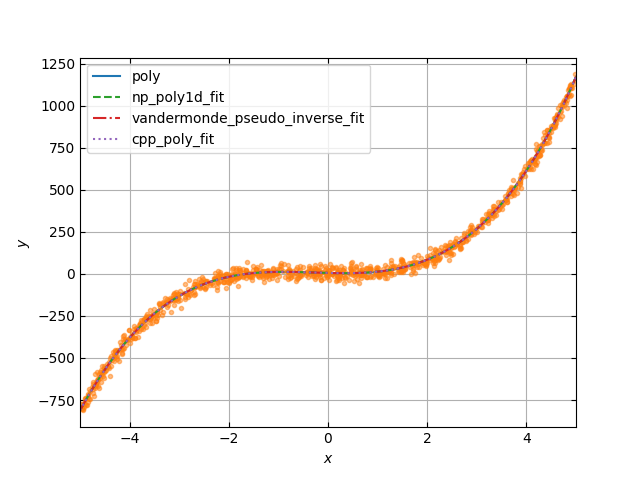

In [6]:
fig, ax = plt.subplots()
ax.plot(xs_poly, ys, '-', label='poly')
ax.plot(xs, ys_noise, '.', alpha=0.5)
ax.plot(xs_poly, ys_np_poly1d_fit, '--', label='np_poly1d_fit')
ax.plot(xs_poly, ys_vandermonde_pseudo_inverse_fit, '-.', label='vandermonde_pseudo_inverse_fit')
ax.plot(xs_poly, ys_cpp_poly_fit, ':', label='cpp_poly_fit')


ax.legend()
ax.set_xlim(xs_poly[0], xs_poly[-1])
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')